#### ROC curve for finding the optimal threshold

A receiver operating characteristics or known as ROC curve is a two-dimensional plot that illustrates how well a classifier system works as the discrimination cut-off value is changed over the range of the predictor variable. The X-axis or independent variable is the false positive rate for the predictive test. The Y-axis or dependent variable is the true positive rate for the predictive test. It is relevant to note that the nearer to the upper-left side of ROC space, the better a classifier is.

Best Threshold=0.016153


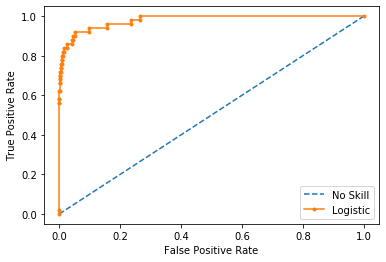

In [14]:

# roc curve for logistic regression model with optimal threshold
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities

y_pred = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]

# calculate roc curves:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



#### G-mean
The geometric mean or known as G-mean is the geometric mean of sensitivity (known as recall) and specificity. This measure tries to maximize the accuracy of each of the classes while keeping these accuracies balanced. So, it will be one of the unbiased evaluation metrics for # imbalanced classification.

Best Threshold=0.016153, G-Mean=0.933


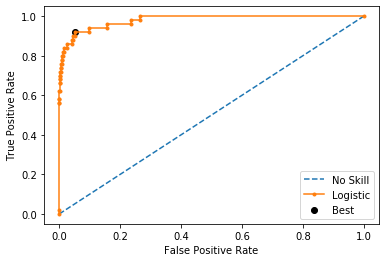

In [16]:
from numpy import argmax
from numpy import sqrt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities

y_pred = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]

# calculate roc curves:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)


# calculate the g-mean for each threshold
gmeans = sqrt(tpr * (1-fpr))

# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
pyplot.show()

#### Youden’s J statistic
Youden’s J index combines sensitivity and specificity into a single measure (Sensitivity + Specificity — 1) and has a value between 0 and 1. Youden’s index is often used in conjunction with ROC analysis. It is also equivalent to the vertical distance above the diagonal line to the ROC curve for a single decision threshold.
The statistic is calculated as:

J = Sensitivity + Specificity – 1
Given that we have Sensitivity (TPR) and the complement of the specificity (FPR), we can calculate it as:

J = Sensitivity + (1 – FalsePositiveRate) – 1
Which we can restate as:

J = TruePositiveRate – FalsePositiveRate
We can then choose the threshold with the largest J statistic value. For example:

In [18]:
# roc curve for logistic regression model with optimal threshold
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities

y_pred = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]

# calculate roc curves:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))


Best Threshold=0.016153


#### The precision-Recall curve for finding the optimal threshold
The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false-positive rate, and high recall relates to a low false-negative rate.

Best Threshold=0.256036, F-Score=0.756


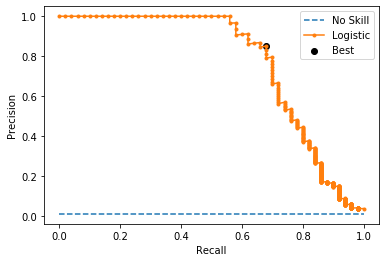

In [21]:
from numpy import argmax
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
# predict probabilities

y_pred = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
y_pred = y_pred[:, 1]

# calculate pr curves
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)

# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

# plot the pr curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

#### Optimal Threshold Tuning

Threshold tuning is a common technique to determine an optimal threshold for imbalanced classification. The sequence of the threshold is generated by the researcher need while the previous techniques using the ROC and Precision & Recall to create a sequence of those thresholds. The advantages are the customization of the threshold sequence as the need but it will have a higher cost of computation.

In [28]:
from numpy import argmax
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score

# generate dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=4)

# split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)

# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)

# prediction
y_pred = model.predict(X_test)

# evaluate the model
score = f1_score(y_test, y_pred)
print('F-Score: %.5f' % score)

F-Score: 0.70130


In [29]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')

In [31]:
# predict probabilities
y_pred = model.predict_proba(X_test)

# keep probabilities for the positive outcome only
probs = y_pred[:, 1]

# define thresholds
thresholds = np.arange(0, 1,0.001)

# evaluate each threshold
scores = [f1_score(y_test, to_labels(probs, t)) for t in thresholds]

# get best threshold
ix = argmax(scores)
print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.251, F-Score=0.75556
